#Artificial Neural Networks (ANN)

ML Lab 8

Artificial Neural Networks (ANN)

---



Vemula Ananya

TSM50 -> 82%

TSM100 -> 80%

TSM200 -> 82%

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout

# Load dataset
data = pd.read_csv('TitanicDataset.csv')

# Feature engineering
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # Encode 'Sex'
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)  # One-hot encode 'Embarked'

# Fill missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ANN model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Save the model
model.save('titanic_survival_model.h5')
print("Model saved as titanic_survival_model.h5")


Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5178 - loss: 0.6918 - val_accuracy: 0.6364 - val_loss: 0.6257
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5756 - loss: 0.6673 - val_accuracy: 0.6434 - val_loss: 0.5860
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6096 - loss: 0.6341 - val_accuracy: 0.6434 - val_loss: 0.5572
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5909 - loss: 0.6261 - val_accuracy: 0.6643 - val_loss: 0.5420
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5964 - loss: 0.6185 - val_accuracy: 0.6853 - val_loss: 0.5296
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6551 - loss: 0.5944 - val_accuracy: 0.6923 - val_loss: 0.5201
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6420 - loss: 0.5889 - val_accuracy: 0.6853 - val_loss: 0.5131
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6477 - loss: 0.5690 - val_accuracy: 0.7203 - val_loss: 0.

Test Accuracy: 0.82
Model saved as titanic_survival_model.h5


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


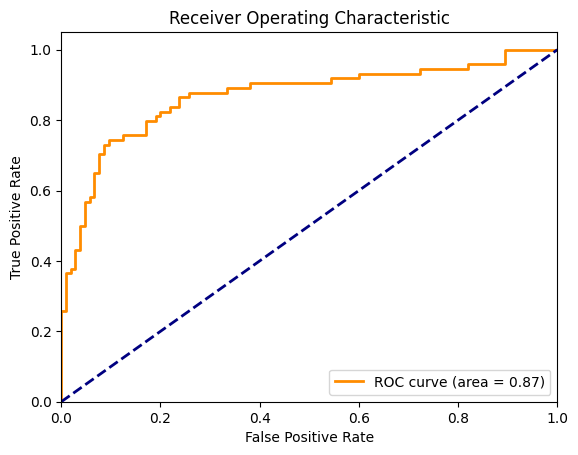

Confusion Matrix:
 [[96  9]
 [21 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       105
           1       0.85      0.72      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [ ]:
# prompt: print the code to check for AUC and ROC and others like confusion matrix and other metrics for the model above

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt


# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

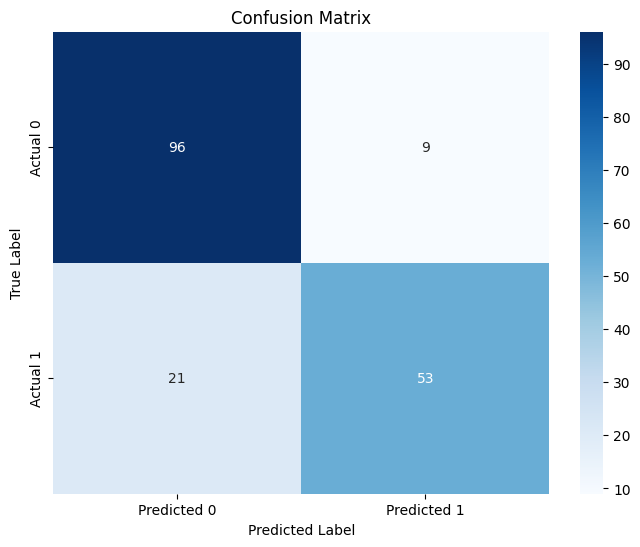


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       105
           1       0.85      0.72      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [ ]:
# prompt: print the confusion matrix properly

import seaborn as sns

# ... (previous code)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#Running The Model

In [ ]:
import random

# List of countries
countries = [
    "China", "USA", "Russia", "North Korea", "Israel", "Pakistan", "Iran", "Iraq",
    "Syria", "India", "United Kingdom", "Japan", "Saudi Arabia", "Germany",
    "Nigeria", "Turkey", "South Korea", "Afghanistan", "Philippines", "England",
    "Italy", "Somalia", "Qatar", "Argentina", "Australia", "Algeria", "Romania",
    "Mexico", "Indonesia", "Vatican City", "Belarus", "Serbia", "Lebanon",
    "Cameroon", "Honduras", "Kazakhstan", "Azerbaijan", "Ukraine", "El Salvador",
    "Guatemala", "Ghana", "Zimbabwe", "Ecuador", "Uzbekistan", "Myanmar",
    "Jordan", "Bangladesh", "Slovakia", "Bahrain", "Cambodia", "Latvia",
    "Uruguay", "Slovenia", "Bulgaria", "Lithuania", "Estonia", "Oman", "Tunisia",
    "Kenya", "Panama", "Colombia", "Sri Lanka", "Hungary", "Kuwait", "Chile",
    "Dominican Republic", "Czechia", "Peru", "Cyprus", "Croatia", "Vietnam",
    "Costa Rica", "South Africa", "Morocco", "Malaysia", "Poland", "Egypt",
    "Brazil", "Portugal", "Thailand", "Luxembourg", "Greece", "Ireland",
    "Belgium", "Iceland", "Austria", "Finland", "Spain", "United Arab Emirates",
    "Singapore", "Netherlands", "France", "Norway", "Denmark", "New Zealand",
    "Sweden", "Canada", "Switzerland", "Andorra", "Liechtenstein", "San Marino",
    "Monaco", "Malta", "Nauru", "Tuvalu", "Palau", "Marshall Islands",
    "Micronesia", "Saint Kitts and Nevis", "Antigua and Barbuda",
    "Saint Vincent and the Grenadines", "Grenada", "Dominica", "Saint Lucia",
    "Barbados", "Trinidad and Tobago", "Belize", "Nicaragua", "Paraguay",
    "Bolivia", "Guyana", "Suriname", "Cape Verde", "Sao Tome and Principe",
    "Equatorial Guinea", "Gabon", "Republic of the Congo",
    "Democratic Republic of the Congo", "Central African Republic", "South Sudan",
    "Djibouti", "Eritrea", "Ethiopia", "Uganda", "Rwanda", "Burundi", "Tanzania",
    "Malawi", "Zambia", "Angola", "Namibia", "Botswana", "Lesotho", "Eswatini",
    "Mauritius", "Seychelles", "Comoros", "Madagascar", "Kiribati", "Samoa",
    "Tonga", "Vanuatu", "Fiji", "Solomon Islands", "Papua New Guinea"
]

# Assign each country a unique number
country_map = {country: i + 1 for i, country in enumerate(countries)}

# Function to get a country's assigned number
def get_country_number(country_name):
    return country_map.get(country_name, random.randint(1, len(country_map) + 1))

# Function to determine embarkation based on country number
def get_embarkation_point(country_name):
    country_number = get_country_number(country_name)
    total_countries = len(country_map)

    if country_number <= total_countries / 3:
        return "Cherbourg"
    elif country_number <= 2 * total_countries / 3:
        return "Queenstown"
    else:
        return "Southampton"


In [ ]:
#Selection of Gender
def get_gender(sex):
  if sex.lower() == "male" or sex.lower() == "other":
    return 0
  else:
    return 1

In [ ]:
# Function to get a random fare within the selected range
def get_fare(fare_choice):
  fare_categories = {
      1: (0, 10),     # Low fare
      2: (10, 50),    # Medium fare
      3: (50, 100),   # High fare
      4: (100, 600)   # Luxury fare
  }
  if fare_choice in fare_categories:
      return random.uniform(*fare_categories[fare_choice])
  else:
      print("Invalid choice. Please select a number from 1 to 4.")
      return get_fare(int(input("Enter fare category (1-4): ")))


In [ ]:
def zodsign_rating(zodsign):
  rates = {
      "Virgo": 1,
      "Scorpio": 2,
      "Leo": 3,
      "Taurus": 4,
      "Capricorn": 5,
      "Aries": 6,
      "Aquarius": 7,
      "Sagittarius": 8,
      "Cancer": 9,
      "Pisces": 10,
      "Libra": 11,
      "Gemini": 12
  }
  return rates[zodsign] % 3

In [ ]:
from datetime import datetime

def get_zodiac_sign_age(day, month, year):

    zodsign, finage = '0', 0
    zodiac_signs = [
        (1, 20, "Capricorn", "Aquarius"),
        (2, 19, "Aquarius", "Pisces"),
        (3, 20, "Pisces", "Aries"),
        (4, 20, "Aries", "Taurus"),
        (5, 21, "Taurus", "Gemini"),
        (6, 21, "Gemini", "Cancer"),
        (7, 23, "Cancer", "Leo"),
        (8, 23, "Leo", "Virgo"),
        (9, 23, "Virgo", "Libra"),
        (10, 23, "Libra", "Scorpio"),
        (11, 22, "Scorpio", "Sagittarius"),
        (12, 22, "Sagittarius", "Capricorn")
    ]

    for m, d, prev_sign, next_sign in zodiac_signs:
        if month == m:
            zodsign = prev_sign if day <= d else next_sign

    today = datetime.today()
    birth_date = datetime(year, month, day)
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    finage = age
    classrating = zodsign_rating(zodsign)
    return classrating, finage

    return "Invalid date"


# day = int(input("Enter birth day: "))
# month = int(input("Enter birth month (as number): "))
# year = int(input("Enter birth year: "))

# zodsign,finage = get_zodiac_sign_age(day, month, year)
# print("Your zodiac sign and age is:", zodsign, finage)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('titanic_survival_model.h5')
print("Model loaded successfully!")

# Function to collect user input
def collect_input():
    print("Please provide the passenger details:")
    sex = input("Enter Sex male, female, or other: ")
    sex = get_gender(sex)
    day = int(input("Enter birth day: "))
    month = int(input("Enter birth month (as number): "))
    year = int(input("Enter birth year: "))
    classrating, finage = get_zodiac_sign_age(day, month, year)
    #age = float(input("Enter Age: "))
    print("Select the fare category:")
    print("1. Low (₹0 - ₹10)")
    print("2. Medium (₹10 - ₹50)")
    print("3. High (₹50 - ₹100)")
    print("4. Luxury (₹100+)")
    fare_choice = int(input("Enter fare category (1-4): "))
    fare = get_fare(fare_choice)
    family_size = int(input("Enter Family Size (number of family members including the passenger): "))
    is_alone = 1 if family_size == 1 else 0
    country_input = input("Enter your country: ").strip()
    embarkation = get_embarkation_point(country_input)


    # Create a DataFrame for the input
    return pd.DataFrame({
        'Pclass': [classrating],
        'Sex': [sex],
        'Age': [finage],
        'Fare': [fare],
        'FamilySize': [family_size],
        'IsAlone': [is_alone],
        'Embarked_Q': [1 if embarkation == 'Queenstown' else 0],
        'Embarked_S': [1 if embarkation == 'Southampton' else 0],

    })

# Collect input
new_data = collect_input()

# Preprocess the new data (scaling)
# scaler = StandardScaler()
# new_data_scaled = scaler.fit_transform(new_data)

new_data_scaled = new_data.values

# Predict survival
prediction = model.predict(new_data_scaled)
survival = (prediction > 0.5).astype(int)

print(f"\nSurvival Probability: {prediction[0][0]:.2f}")
print(f"Prediction: {'Survived' if survival[0][0] == 1 else 'Did not survive'}")


Model loaded successfully!
Please provide the passenger details:
Enter Sex male, female, or other: male
Enter birth day: 3
Enter birth month (as number): 3
Enter birth year: 2003
Select the fare category:
1. Low (₹0 - ₹10)
2. Medium (₹10 - ₹50)
3. High (₹50 - ₹100)
4. Luxury (₹100+)
Enter fare category (1-4): 2
Enter Family Size (number of family members including the passenger): 4
Enter your country: USA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step

Survival Probability: 0.94
Prediction: Survived
